In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
%matplotlib widget
# calling it a second time may prevent some graphics errors
#%matplotlib notebook

#For printing out all cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np

Input values

In [3]:
EndTime = 100    # days
NrIter = 100
beta = 0.5  # Probability to get infected * times people meet
gamma = 0.1  # Vaccination rate
alpha = 0.1  # Recovery rate
tStart = 0
N = 1  # population in biblions
I0 = N*0.01
S0 = N*0.98
R0 = N-I0-S0

In [4]:
h = EndTime/NrIter      #stepsize
time=np.linspace(0,EndTime+1,NrIter+1)

In [13]:
I = [0]*NrIter
I = np.append(I0, I)
S = [0]*NrIter
S = np.append(S0, S)
R = [0]*NrIter
R = np.append(R0, R)

Var=np.array([S,I,R])

In [34]:
#I
#S

In [19]:
def SChange(Vari, *args): #Vari[0] - S, Vari[1] - I, Vari[2] - R
    Change = -beta*Vari[0]*Vari[1]/N - gamma*Vari[0]
    return(Change)


def IChange(Vari, *args):
    Change = beta*Vari[0]*Vari[1]/N - alpha*Vari[1]
    return(Change)


def RChange(Vari, *args):
    Change = gamma*Vari[0] + alpha*Vari[1]
    return(Change)

ChangeList=[SChange,IChange, RChange]  #List of all functions

### Runge-Kutta which does not work

In [24]:
K1=np.array([0.1]*len(Var))
K2=np.array([0.1]*len(Var))
K3=np.array([0.1]*len(Var))
K4=np.array([0.1]*len(Var))

def MyRungeKutta(i, *args):  # i=time
    Vari=Var[:,i]
    #time[i+1]=time[i]+h
    for j,func in enumerate(ChangeList):
        K1[j]=func(Vari)
    
    for j,func in enumerate(ChangeList):
        K2[j]=func(Vari+h*K1)
        
    for j,func in enumerate(ChangeList):
        K3[j]=func(Vari+h*K2)
        
    for j,func in enumerate(ChangeList):
        K4[j]=func(Vari+h*K3)
        
    Var[:,i+1]=Var[:,i] + K1/6+K2/3 + K3/3 + K4/6

In [25]:
def Euler(i,*args):
    Vari=Var[:,i]
    for j,func in enumerate(ChangeList):
        Var[j,i+1]=Var[j,i]+h*func(Vari)

In [26]:
for i in range(NrIter):
    MyRungeKutta(i)

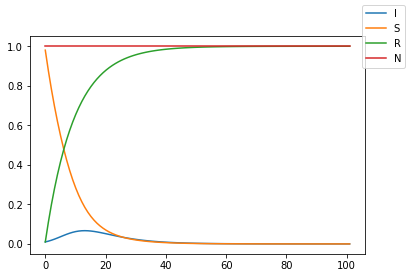

In [32]:
fig, ax=plt.subplots()
ax.plot(time,Var[1],label='I')
ax.plot(time,Var[0],label='S')
ax.plot(time,Var[2],label='R')
ax.plot(time,Var[2]+Var[1]+Var[0],label='N')
fig.legend()
#plt.plot(I)

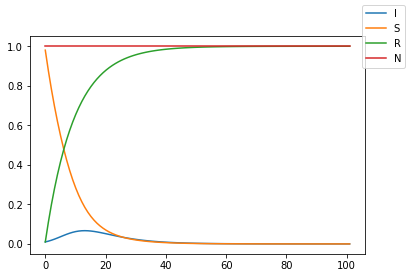

In [31]:
for i in range(NrIter):
    Euler(i)

fig, ax=plt.subplots()
ax.plot(time,Var[1],label='I')
ax.plot(time,Var[0],label='S')
ax.plot(time,Var[2],label='R')
ax.plot(time,Var[2]+Var[1]+Var[0],label='N')
fig.legend()